# Heart Disease Prediction using SVM and Hyperparameter
April 15, 2022

Authors: Chaitanya Madduri

- *Data Origin* : University of California, Irvine
- *URL*: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

- *Brief Summary of the dataset*: The level of analysis is by person and it has demographic information (Age, Sex), pyshical status of the patient (Chest pain, Resting blood preasure, cholesterol, fasting blood pressure, resting ECG, max heart rate, exercise angina, old peak, slope of peak) and the diagnostic data (Hearth disease).

- *Objective of the Analysis*: Patient diagnostic prediction of hearth diseases using 11 varaibles from demographic and physical status of the patient.

- *Methodology*: We will be using 2 Kernels (Polynomial and RBF) as our classification model, each kernel will be optimized for F2 and F0.5 indicators using GridSearch as optimization techniques 


### Detail Context
- Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Attribute Information

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

### Source
- This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

    - Cleveland: 303 observations
    - Hungarian: 294 observations
    - Switzerland: 123 observations
    - Long Beach VA: 200 observations
    - Stalog (Heart) Data Set: 270 observations
    - Total: 1190 observations
    - Duplicated: 272 observations

- Final dataset: 918 observations

- Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

# 1. Tools and Packages

In [156]:
import numpy as np
import pandas as pd
import pickle
import os

import matplotlib.pyplot as plt
import time
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, validation_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#picking models for prediction.
from sklearn.svm import SVC

#ensemble models for better performance
from sklearn.ensemble import RandomForestClassifier



from matplotlib import cm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [157]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# 2. Data Preparation

The next stage we will clean the dataset and prepare all the functions needed to later execute, train, test our model.

### 2.1 Cleaning Data

In [158]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [159]:
data.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [160]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [161]:
import plotly.express as px

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig = px.pie(values = data['HeartDisease'].value_counts(), names= [1,0])
fig.show()

### 2.2 Categorical Values 

In [162]:
num_ix = data.select_dtypes(include=['int64', 'float64']).columns


In [163]:
num_ix

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [164]:
# Descriptive stats
data[num_ix].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Age Disturbution 

In [165]:
fig = px.histogram(data.Age)
fig.show()

In [166]:
data.Age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

***The mean age of teh dataset is above 50 years and same can be interpreted from the histogram and it might be the main reason why we have more number of heart disease cases than not. In this case this case there is an selection bias as the data is more concentrating on Age groups above 40

### RestingBP


In [167]:
fig = px.histogram(data, x="RestingBP", color="HeartDisease")
fig.show()

**above plotted the resting BP which is stacked with heart disease 

### 2.3 Extracting the Categorical Columns and the Numerical columns 

In [168]:
all_columns = list(data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
# list(data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']
Categorical columns:
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical columns:
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


### 2.4 Label Encoding for categorical columns 

##### We also tried one hot coding, which added 10 more columns to the dataset. After training the data with one hot encoding, for test set, accuracy is 0.69, precision is 0.64, recall is 0.76 and F1 is 0.69. So we get better results with label encoding, see below.

In [169]:

label_dict = {}
encoded_data = data.drop(['HeartDisease'], axis=1)
for i in categorical_columns:
    label_encoder = LabelEncoder()
    encoded_data[i] = label_encoder.fit_transform(data[i])
    label_dict[i] = label_encoder
encoded_data[categorical_columns].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [170]:
label_dict['Sex'].transform(pd.Series(['F','M']))

array([0, 1])

In [171]:
with open('label_dict.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(label_dict, f) 

### 2.5 Scaling the data.
Applying the minmax scaler to maintain all the columns in the same magnitude 

In [172]:
min_max_scaler = MinMaxScaler()

scale_encoded_data = encoded_data[numerical_columns]

scale_encoded_data = min_max_scaler.fit_transform(scale_encoded_data)


In [173]:



with open('min_max_scaler.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(min_max_scaler, f) 

In [174]:
# min_max_scaler.tranform(data[['Age',
#  'RestingBP',
#  'Cholesterol',
#  'FastingBS',
#  'MaxHR',
#  'Oldpeak']])

In [175]:
scale_encoded_data = pd.DataFrame(scale_encoded_data, columns=numerical_columns)

In [176]:
for i in scale_encoded_data.columns:
    encoded_data[i] = scale_encoded_data[i]

### 2.6 Prepare data for training

In [177]:
X = encoded_data
y = data['HeartDisease']

In [178]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=62, stratify=y) # using stratify split


In [179]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
285,0.469388,0,2,0.550,0.315091,0.0,1,0.422535,0,0.295455,2
370,0.653061,1,0,0.675,0.000000,0.0,1,0.021127,1,0.352273,2
100,0.755102,1,0,0.650,0.456053,0.0,2,0.387324,1,0.409091,1
637,0.306122,1,0,0.575,0.502488,0.0,1,0.852113,0,0.431818,1
395,0.204082,1,0,0.675,0.000000,1.0,1,0.633803,0,0.295455,1


In [180]:
print("Target Training Data Shape:" , y_train.shape)
print("Target Test Data Shape:" , y_test.shape)
print("Variables Training Data Shape:" , X_train.shape)
print("Variable Test Data Shape:" , X_test.shape)

Target Training Data Shape: (688,)
Target Test Data Shape: (230,)
Variables Training Data Shape: (688, 11)
Variable Test Data Shape: (230, 11)


### 2.7  Creation of Key Functions

In [181]:
# make f2 a valid validation
def f2_scorer(y_true, y_pred):
    y_true, y_pred, = np.array(y_true), np.array(y_pred)
    return fbeta_score(y_true, y_pred, beta = 2, pos_label = 0, average = 'binary')

f2 = make_scorer(f2_scorer, greater_is_better=True)

# here for question b: make f05 a valid validation
def f05_scorer(y_true, y_pred):
    y_true, y_pred, = np.array(y_true), np.array(y_pred)
    return fbeta_score(y_true, y_pred, beta = 0.5, pos_label = 0, average = 'binary')

f05 = make_scorer(f05_scorer, greater_is_better = True)

## Building the model with Best parameters 

- As per the Detailed analysis we have understoof that the below parameters are best for the model buyilding. We have take the best parameters from tehSVM grid search and the manual analysis

In [182]:
svm_bestf2 = svm.SVC(C = 10, 
                     gamma = 0.5,
                     kernel = 'rbf',degree = 2)
                     #random_state = 0)
svm_bestf2.fit(X_train, y_train)

y_train_pred = svm_bestf2.predict(X_train)
y_test_pred = svm_bestf2.predict(X_test)


SVC(C=10, degree=2, gamma=0.5)

In [183]:
# svm_bestf2


import pickle
import os

with open('dash_svm.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(svm_bestf2, f) 

#### Confusion matrix

<AxesSubplot:>

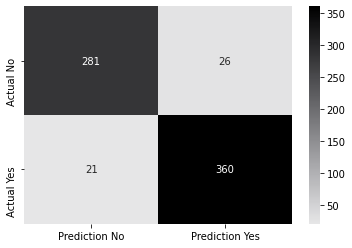

In [184]:

conf_mat_train = confusion_matrix(y_train, y_train_pred)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf_mat_train,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')




In [185]:
conf_mat_train

array([[281,  26],
       [ 21, 360]], dtype=int64)

<AxesSubplot:>

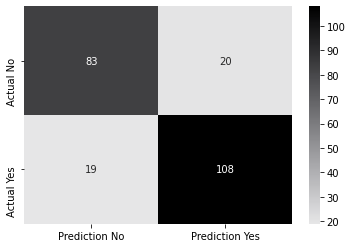

In [186]:


conf_mat_test = confusion_matrix(y_test, y_test_pred)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf_mat_test,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')


In [187]:
## F2 Scores 
f2_train = f2_scorer(y_train, y_train_pred)
f2_test = f2_scorer(y_test, y_test_pred)


print('f2 score of training sample: ', f2_train)
print('f2 score of test sample: ', f2_test)

f2 score of training sample:  0.9183006535947713
f2 score of test sample:  0.8073929961089493


In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    

In [189]:
#Train Metrics
generate_model_report(y_train, y_train_pred)

Accuracy =  0.9316860465116279
Precision =  0.9326424870466321
Recall =  0.9448818897637795
F1 Score =  0.9387222946544981


In [190]:
#Test Metrics
generate_model_report(y_test, y_test_pred)

Accuracy =  0.8304347826086956
Precision =  0.84375
Recall =  0.8503937007874016
F1 Score =  0.8470588235294119


In [191]:
# results.to_csv('Results_heart.csv', index=None)

### End of the Notebook